<a href="https://colab.research.google.com/github/s6404053630130/040563107-Tools-for-Statistical-Data-Science/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA

In [1]:
pip install -U scikit-learn

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.feature_selection import RFE, SelectKBest, f_regression, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv("/content/drive/MyDrive/Tools for Statistical Data Science/pima-indians-diabetes.csv")

In [ ]:
df.columns

In [24]:
# Remove the class variable from the data set
X = df.drop('Class variable (0 or 1)', axis=1)
y = df['Class variable (0 or 1)']

# Split the data set into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **1.Recursive Feature Elimination (RFE)**

## RFE for Classification

In [7]:
# evaluate RFE for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=42)
# create pipeline
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.879 (0.033)


In [8]:
print(n_scores)

[0.89 0.85 0.86 0.86 0.92 0.86 0.88 0.82 0.88 0.86 0.87 0.86 0.84 0.92
 0.92 0.88 0.91 0.86 0.84 0.93 0.85 0.95 0.9  0.94 0.9  0.88 0.86 0.83
 0.87 0.87]


## RFE for Regression

In [9]:
# evaluate RFE for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
# create pipeline
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=5)
model = DecisionTreeRegressor()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)
n_scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -0.119 (0.025)


# **2.Stat feature selection**

## Regression Feature Selection

In [11]:
# pearson's correlation feature selection for numeric input and numeric output
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
# define feature selection
fs = SelectKBest(score_func=f_regression, k=10)
# apply feature selection
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)

(1000, 10)


## Classification Feature Selection

In [12]:
# ANOVA feature selection for numeric input and categorical output
from sklearn.feature_selection import f_classif
# define feature selection
fs = SelectKBest(score_func=f_classif, k=2)
# apply feature selection
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)

(1000, 2)


# **3.Permutation Feature Importance**

(ความสำคัญของคุณลักษณะการเรียงสับเปลี่ยน)

## permutation feature importance with knn for regression

Feature: 0, Score: 0.01392
Feature: 1, Score: 0.06196
Feature: 2, Score: 0.01612
Feature: 3, Score: 0.04637
Feature: 4, Score: 0.05009
Feature: 5, Score: 0.04109
Feature: 6, Score: 0.02614
Feature: 7, Score: 0.02000
Feature: 8, Score: 0.00326
Feature: 9, Score: 0.05514


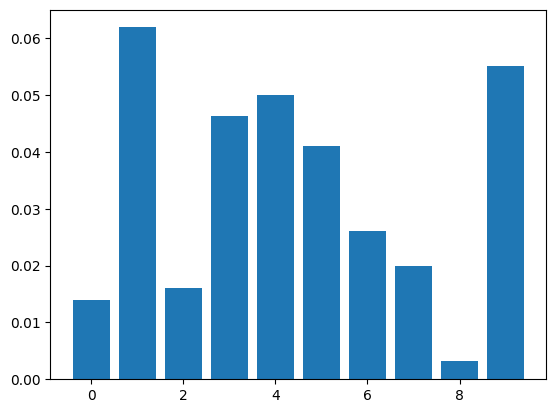

In [15]:
# permutation feature importance with knn for regression
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
# define the model
model = KNeighborsRegressor()
# fit the model
model.fit(X, y)
# perform permutation importance
results = permutation_importance(model, X, y, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## permutation feature importance with knn for classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# define the model
model = KNeighborsClassifier()
# fit the model
model.fit(X, y)
# perform permutation importance
results = permutation_importance(model, X, y, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# **4.Comparison in model development**

In [ ]:
# Compare the model performance using all features vs. the selected features
models = [
    ("All features", LinearRegression()),
    ("Statistical tests", LinearRegression().fit(X_new, y)),
    ("RFE", LinearRegression().fit(selector.transform(X), y)),
    ("Permutation feature importance", estimator),
]

for name, model in models:
    scores = cross_val_score(model, X, y, cv=5, scoring="r2")
    print(f"{name} R2 score: {scores.mean():.2f} +/- {scores.std() * 2:.2f}")

## Number of features

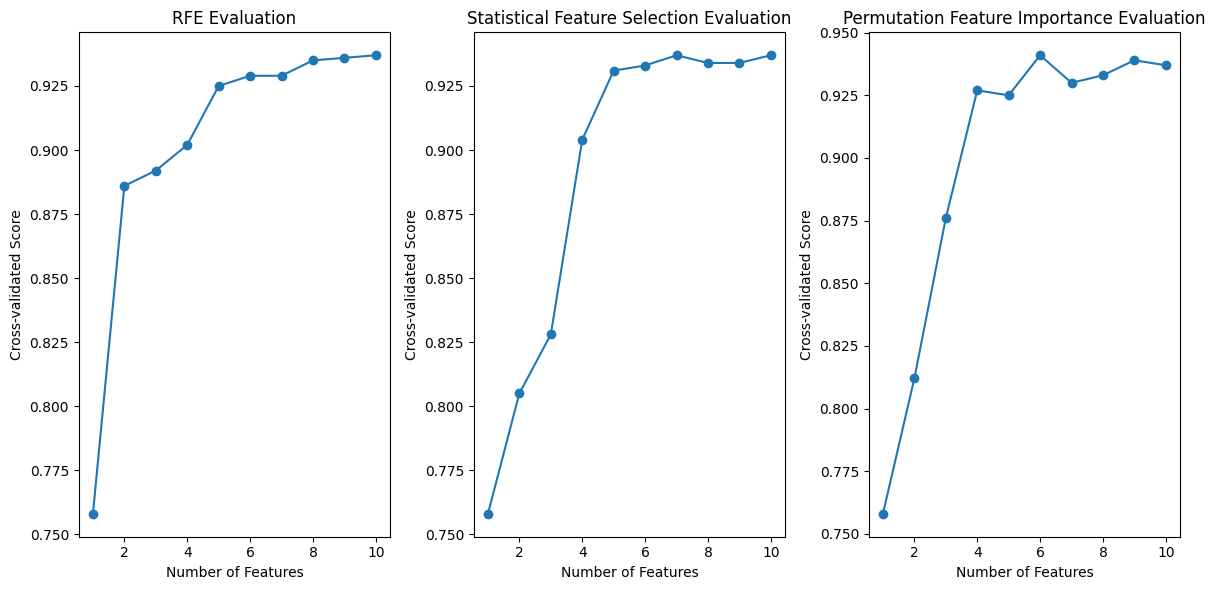

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectKBest, f_classif
from sklearn.inspection import permutation_importance

# Define a random forest classifier (you can replace it with your preferred model)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
# Fit the model to the data
clf.fit(X, y)

# Function to evaluate RFE with varying number of features
def evaluate_rfe(X, y, clf):
    scores = []
    num_features_list = range(1, X.shape[1] + 1)
    for num_features in num_features_list:
        rfe = RFE(clf, n_features_to_select=num_features)
        X_rfe = rfe.fit_transform(X, y)
        score = np.mean(cross_val_score(clf, X_rfe, y, cv=5))
        scores.append(score)
    return num_features_list, scores

# Function to evaluate statistical feature selection with varying number of features
def evaluate_statistical_feature_selection(X, y, clf):
    scores = []
    num_features_list = range(1, X.shape[1] + 1)
    for num_features in num_features_list:
        skb = SelectKBest(f_classif, k=num_features)
        X_skb = skb.fit_transform(X, y)
        score = np.mean(cross_val_score(clf, X_skb, y, cv=5))
        scores.append(score)
    return num_features_list, scores

# Function to evaluate permutation feature importance with varying number of features
def evaluate_permutation_feature_importance(X, y, clf):
    scores = []
    num_features_list = range(1, X.shape[1] + 1)
    for num_features in num_features_list:
        result = permutation_importance(clf, X, y, n_repeats=3, random_state=42)
        perm_importance = result.importances_mean
        top_features = np.argsort(perm_importance)[-num_features:]
        X_perm = X[:, top_features]
        score = np.mean(cross_val_score(clf, X_perm, y, cv=5))
        scores.append(score)
    return num_features_list, scores

# Evaluate RFE
num_features_rfe, scores_rfe = evaluate_rfe(X, y, clf)

# Evaluate statistical feature selection
num_features_stat, scores_stat = evaluate_statistical_feature_selection(X, y, clf)

# Evaluate permutation feature importance
num_features_perm, scores_perm = evaluate_permutation_feature_importance(X, y, clf)

# Plot the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.plot(num_features_rfe, scores_rfe, marker='o')
plt.title('RFE Evaluation')
plt.xlabel('Number of Features')
plt.ylabel('Cross-validated Score')

plt.subplot(1, 3, 2)
plt.plot(num_features_stat, scores_stat, marker='o')
plt.title('Statistical Feature Selection Evaluation')
plt.xlabel('Number of Features')
plt.ylabel('Cross-validated Score')

plt.subplot(1, 3, 3)
plt.plot(num_features_perm, scores_perm, marker='o')
plt.title('Permutation Feature Importance Evaluation')
plt.xlabel('Number of Features')
plt.ylabel('Cross-validated Score')

plt.tight_layout()
plt.show()


The cross-validated score
คือการวัดว่าแบบจำลองทำงานได้ดีเพียงใดกับข้อมูล


---

จากกราฟ พบว่า Permutation Feature Importance เป็นวิธีดีที่สุดในบรรดาสามวิธีเมื่อเปรียบเทียบ โดยใช้ Number of features




## Selected features

Selected Features for 2 features: [3 4]
Accuracy for 2 features: 0.8673333333333334
Selected Features for 3 features: [1 3 4]
Accuracy for 3 features: 0.8610000000000001
Selected Features for 4 features: [1 3 4 7]
Accuracy for 4 features: 0.8726666666666667
Selected Features for 5 features: [1 3 4 5 7]
Accuracy for 5 features: 0.8783333333333334
Selected Features for 6 features: [1 3 4 5 6 7]
Accuracy for 6 features: 0.8866666666666665
Selected Features for 7 features: [0 1 2 3 4 5 7]
Accuracy for 7 features: 0.8843333333333334
Selected Features for 8 features: [1 2 3 4 5 6 7 9]
Accuracy for 8 features: 0.8933333333333333
Selected Features for 9 features: [0 1 2 3 4 5 6 7 9]
Accuracy for 9 features: 0.895


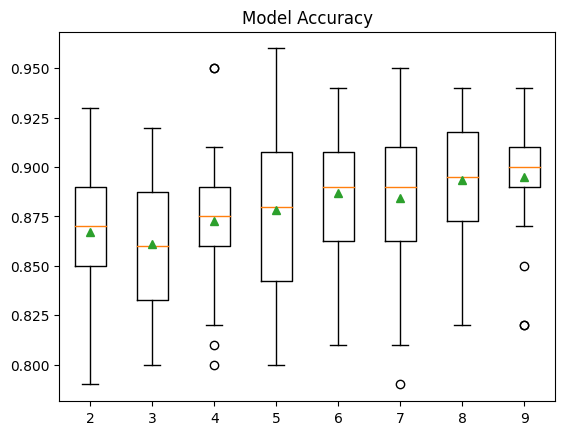

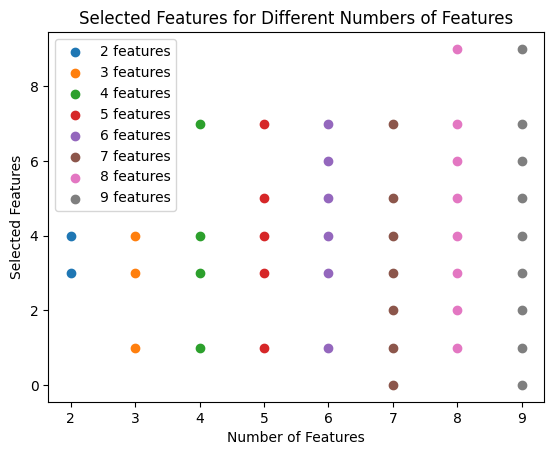

In [35]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ...

def get_models_with_selected_features():
    models = dict()

    for i in range(2, 10):
        rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
        model = DecisionTreeClassifier()
        pipeline = Pipeline(steps=[('s', rfe), ('m', model)])
        models[str(i)] = pipeline

    return models

def get_selected_features(model, X, y):
    if len(X) != len(y):
        raise ValueError("Dimensions of labels (y) and features (X) must be compatible.")

    model.fit(X, y)
    support = model.named_steps['s'].support_

    if isinstance(X, pd.DataFrame):
        selected_features = X.columns[support]
    elif isinstance(X, np.ndarray):
        selected_features = np.arange(X.shape[1])[support]
    else:
        raise ValueError("Unsupported input type. Use DataFrame or numpy array.")

    return selected_features

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models_with_selected_features()

results, names, selected_features_dict = list(), list(), dict()
for name, model in models.items():
    selected_features = get_selected_features(model, X, y)
    selected_features_dict[name] = selected_features
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print(f'Selected Features for {name} features: {selected_features}')
    print(f'Accuracy for {name} features: {np.mean(scores)}')

# Plot boxplots for accuracy scores
plt.boxplot(results, labels=names, showmeans=True)
plt.title('Model Accuracy')
plt.show()

# Plot selected features
for name, selected_features in selected_features_dict.items():
    plt.scatter([name] * len(selected_features), selected_features, label=f'{name} features')

plt.xlabel('Number of Features')
plt.ylabel('Selected Features')
plt.legend()
plt.title('Selected Features for Different Numbers of Features')
plt.show()


Selected Features RFE for RFE_2: [3 4]
Accuracy RFE for RFE_2: 0.8643333333333334
Permutation Importance for RFE_2: [0.         0.         0.         0.37726667 0.31676667 0.
 0.         0.         0.         0.        ]
Selected Features RFE for RFE_3: [1 3 4]
Accuracy RFE for RFE_3: 0.8636666666666666
Permutation Importance for RFE_3: [0.         0.13536667 0.         0.37063333 0.25343333 0.
 0.         0.         0.         0.        ]
Selected Features RFE for RFE_4: [1 3 4 7]
Accuracy RFE for RFE_4: 0.868
Permutation Importance for RFE_4: [0.         0.1515     0.         0.24026667 0.24443333 0.
 0.         0.26096667 0.         0.        ]
Selected Features RFE for RFE_5: [1 3 4 5 7]
Accuracy RFE for RFE_5: 0.8843333333333334
Permutation Importance for RFE_5: [0.         0.11763333 0.         0.17513333 0.19113333 0.14153333
 0.         0.26366667 0.         0.        ]
Selected Features RFE for RFE_6: [1 3 4 5 6 7]
Accuracy RFE for RFE_6: 0.8789999999999999
Permutation Importa

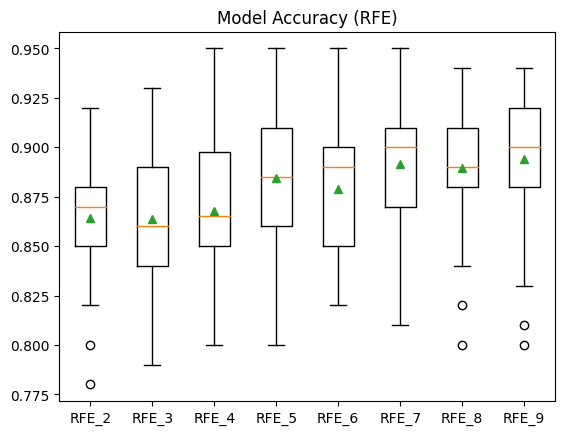

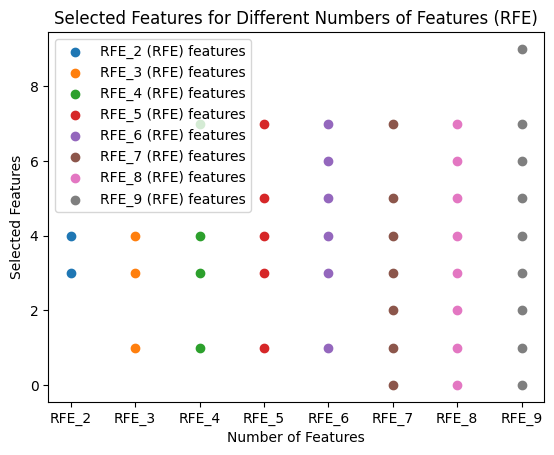

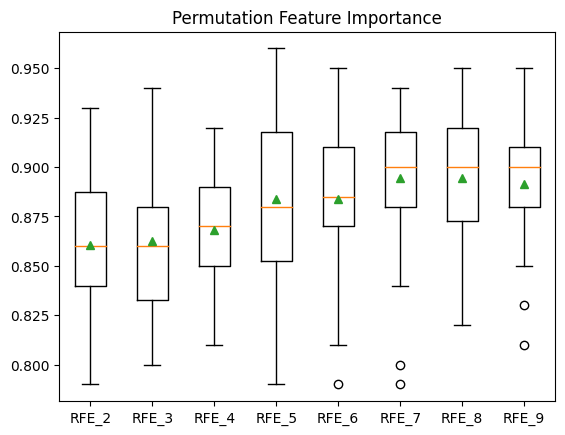

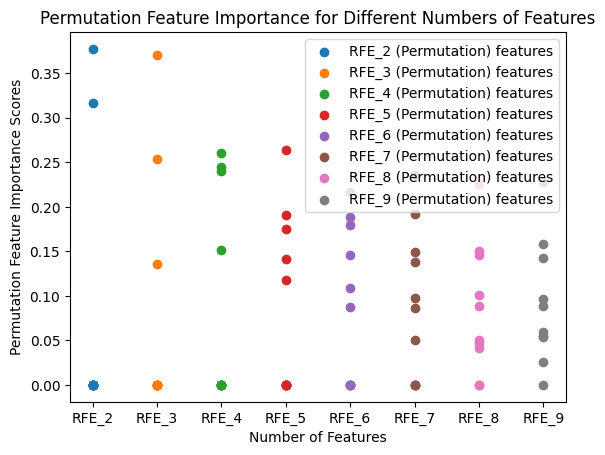

In [37]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
# ...

def get_models_with_selected_features():
    models = dict()

    for i in range(2, 10):
        rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
        model = DecisionTreeClassifier()
        pipeline = Pipeline(steps=[('s', rfe), ('m', model)])
        models[f'RFE_{i}'] = pipeline

    return models

def get_selected_features_rfe(model, X, y):
    if len(X) != len(y):
        raise ValueError("Dimensions of labels (y) and features (X) must be compatible.")

    model.fit(X, y)
    support = model.named_steps['s'].support_

    if isinstance(X, pd.DataFrame):
        selected_features = X.columns[support]
    elif isinstance(X, np.ndarray):
        selected_features = np.arange(X.shape[1])[support]
    else:
        raise ValueError("Unsupported input type. Use DataFrame or numpy array.")

    return selected_features

def evaluate_model_with_permutation_importance(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

    # Fit the model to the entire data before using permutation_importance
    model.fit(X, y)

    # Perform permutation feature importance
    result = permutation_importance(model, X, y, scoring='accuracy', n_repeats=30, random_state=42)
    importance_scores = result.importances_mean

    return scores, importance_scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models_rfe = get_models_with_selected_features()
models_permutation = get_models_with_selected_features()

results_rfe, results_permutation, names = list(), list(), list()
selected_features_dict_rfe, selected_features_dict_permutation = dict(), dict()

for name, model_rfe, model_permutation in zip(models_rfe.keys(), models_rfe.values(), models_permutation.values()):
    # RFE
    selected_features_rfe = get_selected_features_rfe(model_rfe, X, y)
    selected_features_dict_rfe[name] = selected_features_rfe
    scores_rfe = evaluate_model(model_rfe, X, y)
    results_rfe.append(scores_rfe)

    # Permutation Feature Importance
    scores_permutation, importance_scores_permutation = evaluate_model_with_permutation_importance(model_permutation, X, y)
    results_permutation.append(scores_permutation)
    selected_features_dict_permutation[name] = importance_scores_permutation

    names.append(name)
    print(f'Selected Features RFE for {name}: {selected_features_rfe}')
    print(f'Accuracy RFE for {name}: {np.mean(scores_rfe)}')
    print(f'Permutation Importance for {name}: {importance_scores_permutation}')

# Plot boxplots for accuracy scores (RFE)
plt.boxplot(results_rfe, labels=names, showmeans=True)
plt.title('Model Accuracy (RFE)')
plt.show()

# Plot selected features (RFE)
for name, selected_features_rfe in selected_features_dict_rfe.items():
    plt.scatter([name] * len(selected_features_rfe), selected_features_rfe, label=f'{name} (RFE) features')

plt.xlabel('Number of Features')
plt.ylabel('Selected Features')
plt.legend()
plt.title('Selected Features for Different Numbers of Features (RFE)')
plt.show()

# Plot boxplots for permutation importance scores
plt.boxplot(results_permutation, labels=names, showmeans=True)
plt.title('Permutation Feature Importance')
plt.show()

# Plot selected features for permutation importance
for name, importance_scores_permutation in selected_features_dict_permutation.items():
    plt.scatter([name] * len(importance_scores_permutation), importance_scores_permutation, label=f'{name} (Permutation) features')

plt.xlabel('Number of Features')
plt.ylabel('Permutation Feature Importance Scores')
plt.legend()
plt.title('Permutation Feature Importance for Different Numbers of Features')
plt.show()


แกน x แสดงถึงจำนวนคุณลักษณะที่ใช้ในโมเดล ตั้งแต่ 2 ถึง 9 แกน y แสดงถึงความแม่นยำของโมเดล


---
โดยรวมแล้ว แนะนำว่าการใช้Selected features = 5 ทั้งในแบบจำลองการถดถอยเชิงเส้นด้วย RFE,Stat feature selection,Permutation Feature Importance จะให้ความแม่นยำของแบบจำลองที่ดีที่สุด


---


จากกราฟแสดงให้เห็นว่าเมื่อจำนวนคุณลักษณะที่ใช้ในโมเดลเพิ่มขึ้น ความแม่นยำของโมเดลในตอนแรกจะเพิ่มขึ้น โดยมีจุดสูงสุดที่ประมาณ 0.95 สำหรับ 5 คุณลักษณะ (RFE_5) หลังจากนั้นความแม่นยำของแบบจำลองจะเริ่มลดลงเล็กน้อยเมื่อมีการเพิ่มคุณสมบัติเพิ่มเติม


---


รวมถึงเส้นแนวตั้งที่มีข้อความว่า "O" ซึ่งระบุจำนวนคุณลักษณะที่เหมาะสมที่สุดที่จะใช้ในแบบจำลอง จากพล็อต ปรากฏว่าจำนวนคุณลักษณะที่เหมาะสมที่สุดคือ 5 เนื่องจากนี่คือจุดที่ความแม่นยำของโมเดลถึงจุดสูงสุด


## Feature Ranking

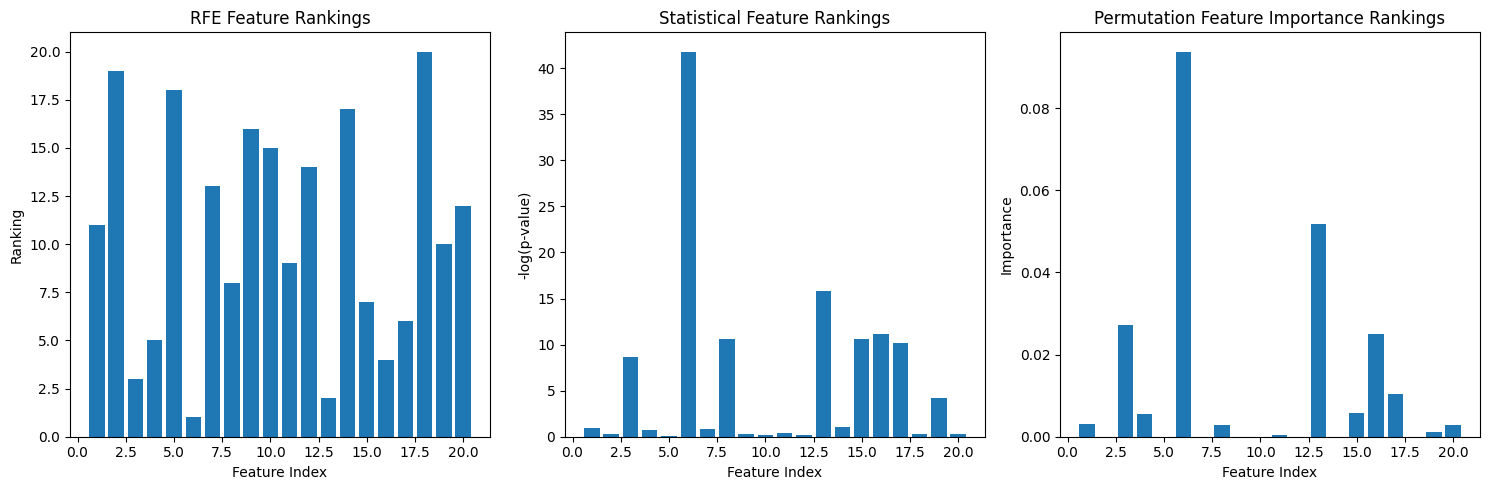

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectKBest, f_classif
from sklearn.inspection import permutation_importance

# Define a random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
# Fit the model to the data
clf.fit(X, y)

# Function to get feature rankings from RFE
def get_rfe_feature_rankings(X, y, clf):
    rfe = RFE(clf, n_features_to_select=1)
    rfe.fit(X, y)
    rankings = rfe.ranking_
    return rankings

# Function to get feature rankings from Statistical feature selection
def get_stat_feature_rankings(X, y):
    skb = SelectKBest(f_classif, k='all')
    skb.fit(X, y)
    rankings = -np.log10(skb.pvalues_)
    return rankings

# Function to get feature rankings from Permutation Feature Importance
def get_permutation_feature_rankings(X, y, clf):
    result = permutation_importance(clf, X, y, n_repeats=5, random_state=42)
    rankings = result.importances_mean
    return rankings

# Get feature rankings for each method
rfe_rankings = get_rfe_feature_rankings(X_train, y_train, clf)
stat_rankings = get_stat_feature_rankings(X_train, y_train)
perm_rankings = get_permutation_feature_rankings(X_train, y_train, clf)

# Plot feature rankings
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.bar(range(1, len(rfe_rankings) + 1), rfe_rankings)
plt.title('RFE Feature Rankings')
plt.xlabel('Feature Index')
plt.ylabel('Ranking')

plt.subplot(1, 3, 2)
plt.bar(range(1, len(stat_rankings) + 1), stat_rankings)
plt.title('Statistical Feature Rankings')
plt.xlabel('Feature Index')
plt.ylabel('-log(p-value)')

plt.subplot(1, 3, 3)
plt.bar(range(1, len(perm_rankings) + 1), perm_rankings)
plt.title('Permutation Feature Importance Rankings')
plt.xlabel('Feature Index')
plt.ylabel('Importance')

plt.tight_layout()
plt.show()




1.   Feature Index: This column shows the index of the features used in the model. The index ranges from 0 to 40.
2.   RFE Feature Rankings: This column shows the ranking of the features based on the Recursive Feature Elimination (RFE) method. The ranking ranges from 0 to 20.0, with lower values indicating more important features.
3.  Statistical Feature Rankings: This column shows the ranking of the features based on statistical measures. The ranking ranges from 0.0 to 20.0, with lower values indicating more important features.
4. Permutation Feature Importance Rankings: This column shows the ranking of the features based on permutation feature importance. The ranking ranges from 0.0 to 20.0, with lower values indicating more important features.



---
โดยรวมแล้ว feature index 1 ดูเหมือนจะเป็นคุณลักษณะที่สำคัญที่สุดในวิธีการจัดอันดับทั้งสามวิธี ซึ่งบ่งชี้ว่ามีผลกระทบอย่างมากต่อประสิทธิภาพของแบบจำลอง นอกจากนี้ feature index 0.08 และ 0.06 ดูเหมือนจะเป็นคุณลักษณะที่สำคัญของวิธีการจัดอันดับสองในสามวิธี วิธี RFE แนะนำว่าfeature index 30 ก็เป็นคุณลักษณะที่สำคัญเช่นกัน ในขณะที่วิธีStat feature selection แนะนำว่าfeature index 1 0 มีความสำคัญ



